In [12]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 653.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 416.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 438.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 473.7 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 754.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 793.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
from keras.src.utils.numerical_utils import to_categorical
from keras.src.saving.saving_api import load_model
import seaborn as sns
import os

In [2]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)',      
            3:'Speed limit (50km/h)',       
            4:'Speed limit (60km/h)',      
            5:'Speed limit (70km/h)',    
            6:'Speed limit (80km/h)',      
            7:'End of speed limit (80km/h)',     
            8:'Speed limit (100km/h)',    
            9:'Speed limit (120km/h)',     
           10:'No passing',   
           11:'No passing veh over 3.5 tons',     
           12:'Right-of-way at intersection',     
           13:'Priority road',    
           14:'Yield',     
           15:'Stop',       
           16:'No vehicles',       
           17:'Veh > 3.5 tons prohibited',       
           18:'No entry',       
           19:'General caution',     
           20:'Dangerous curve left',      
           21:'Dangerous curve right',   
           22:'Double curve',      
           23:'Bumpy road',     
           24:'Slippery road',       
           25:'Road narrows on the right',  
           26:'Road work',    
           27:'Traffic signals',      
           28:'Pedestrians',     
           29:'Children crossing',     
           30:'Bicycles crossing',       
           31:'Beware of ice/snow',
           32:'Wild animals crossing',      
           33:'End speed + passing limits',      
           34:'Turn right ahead',     
           35:'Turn left ahead',       
           36:'Ahead only',      
           37:'Go straight or right',      
           38:'Go straight or left',      
           39:'Keep right',     
           40:'Keep left',      
           41:'Roundabout mandatory',     
           42:'End of no passing',      
           43:'End no passing veh > 3.5 tons' }

In [4]:
# Đọc dữ liệu từ file test.csv và tiền xử lý
def load_data_from_csv(csv_file):
    data = []
    labels = []
    with open(csv_file, 'r') as file:
        lines = file.readlines()[1:]  # Bỏ qua dòng tiêu đề
        for line in lines:
            parts = line.strip().split(',')
            image_path = parts[-1]
            try:
                image = Image.open(image_path)
                image = image.resize((30, 30))
                image = np.array(image)
                data.append(image)
                labels.append(int(parts[-2]))  # ClassId là phần thứ 7 từ cuối dòng
            except Exception as e:
                print(f"Error loading image: {e}")
    return np.array(data), np.array(labels)

In [5]:
# Load dữ liệu thử nghiệm
X_test, y_test = load_data_from_csv("test.csv")

In [6]:
# Load dữ liệu thử nghiệm
X_train, y_train = load_data_from_csv("Train.csv")

In [3]:
# Load mô hình đã được lưu
model = load_model("my_model.h5")

d:\Setting_code\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,253 (946.30 KB)

 Trainable params: 242,251 (946.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Độ chính xác của mô hình

In [9]:
# Đánh giá hiệu suất trên dữ liệu thử nghiệm
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [10]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.9338083927157561


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


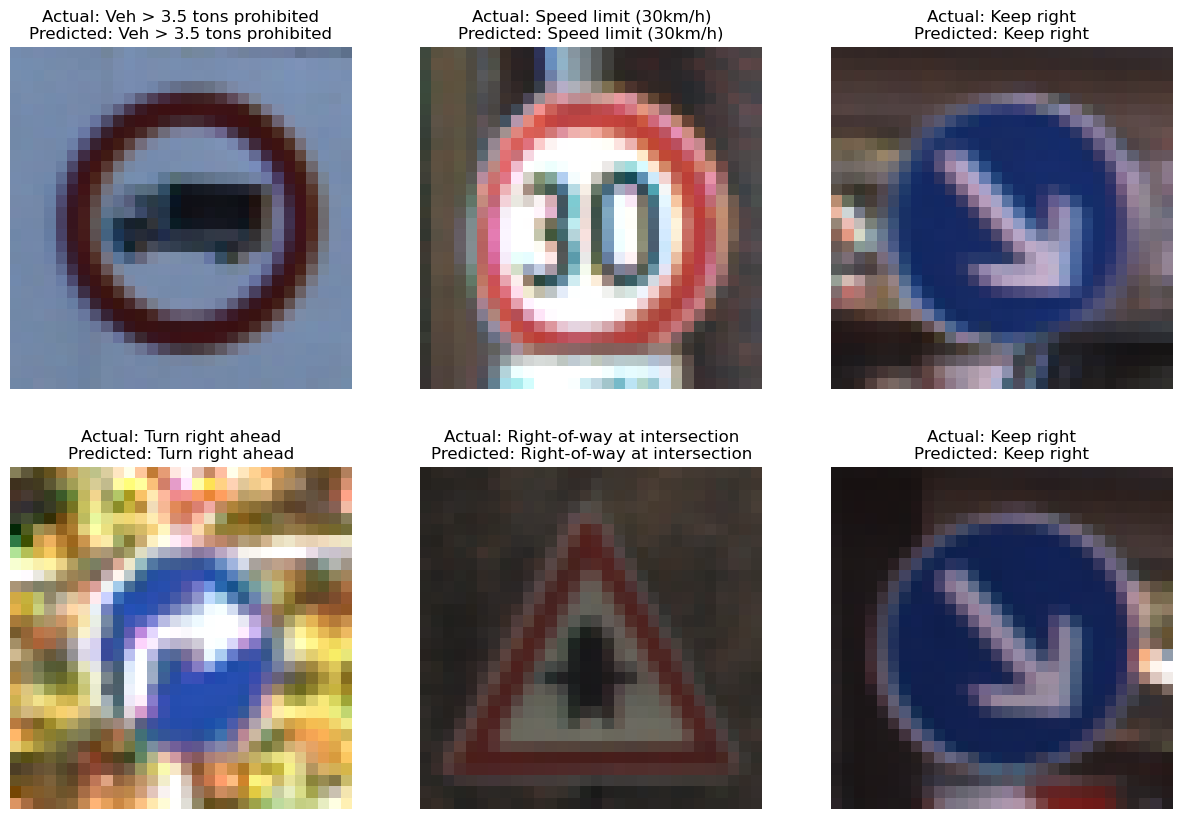

In [11]:
# Chọn 6 ảnh đầu tiên từ tập dữ liệu thử nghiệm để dự đoán và đánh giá
num_samples = 6
X_sample = X_test[:num_samples]
y_sample = y_test[:num_samples]

# Dự đoán và lấy nhãn dự đoán cho 6 ảnh đầu tiên
y_pred = model.predict(X_sample)
y_pred_class = np.argmax(y_pred, axis=1)

# Plot các ảnh và dự đoán của mô hình
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_sample[i])
    actual_label = y_sample[i]+1
    predicted_label = y_pred_class[i]+1
    predicted_class_name = classes[predicted_label]
    if actual_label == predicted_label:
        plt.title(f"Actual: {classes[actual_label]}\nPredicted: {predicted_class_name}")
    else:
        plt.title(f"Actual: {classes[actual_label]}, '\n',Predicted: {predicted_class_name} (incorrect)")
    plt.axis('off')
plt.show()


# Confusion Matrix

In [15]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred_classes)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.96      0.97      0.96       720
           2       0.98      0.95      0.97       750
           3       0.89      0.95      0.92       450
           4       0.97      0.93      0.95       660
           5       0.84      0.96      0.89       630
           6       0.97      0.89      0.93       150
           7       0.98      0.93      0.95       450
           8       0.85      0.90      0.87       450
           9       0.92      0.98      0.95       480
          10       0.98      0.96      0.97       660
          11       0.94      0.88      0.91       420
          12       1.00      0.89      0.94       690
          13       0.99      0.95      0.97       720
          14       0.99      1.00      0.99       270
          15       0.93      0.98      0.95       210
          16       0.92      1.00      0.96       150
          17       1.00    

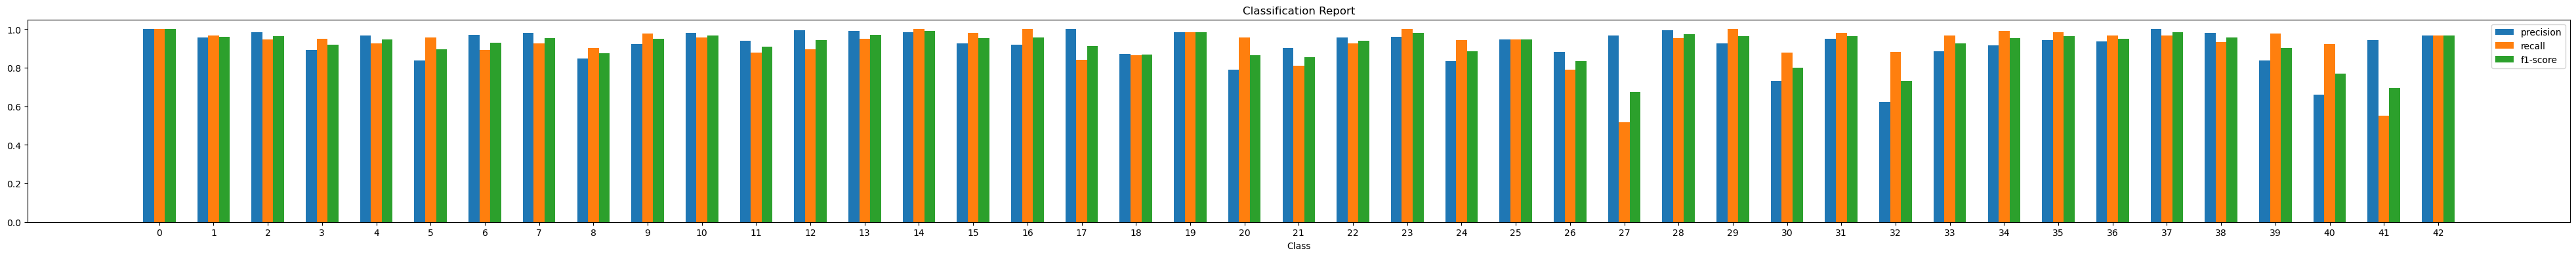

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Tạo báo cáo phân loại
class_report = classification_report(y_test, y_pred_classes, output_dict=True)

# Lấy các lớp và các chỉ số (precision, recall, f1-score) từ báo cáo
classes = list(class_report.keys())[:-3]  # Loại bỏ 'micro avg', 'macro avg', 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

# Tạo biểu đồ
fig, ax = plt.subplots(figsize=(50, 4))

# Vẽ biểu đồ cho từng chỉ số (precision, recall, f1-score)
for i, metric in enumerate(metrics):
    values = [class_report[class_name][metric] for class_name in classes]
    ax.bar(np.arange(len(classes)) + i * 0.2, values, width=0.2, label=metric)

# Đặt nhãn và tiêu đề
ax.set_xticks(np.arange(len(classes)) + 0.2)
ax.set_xticklabels(classes)
ax.set_xlabel('Class')
ax.set_title('Classification Report')
ax.legend()

plt.show()


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


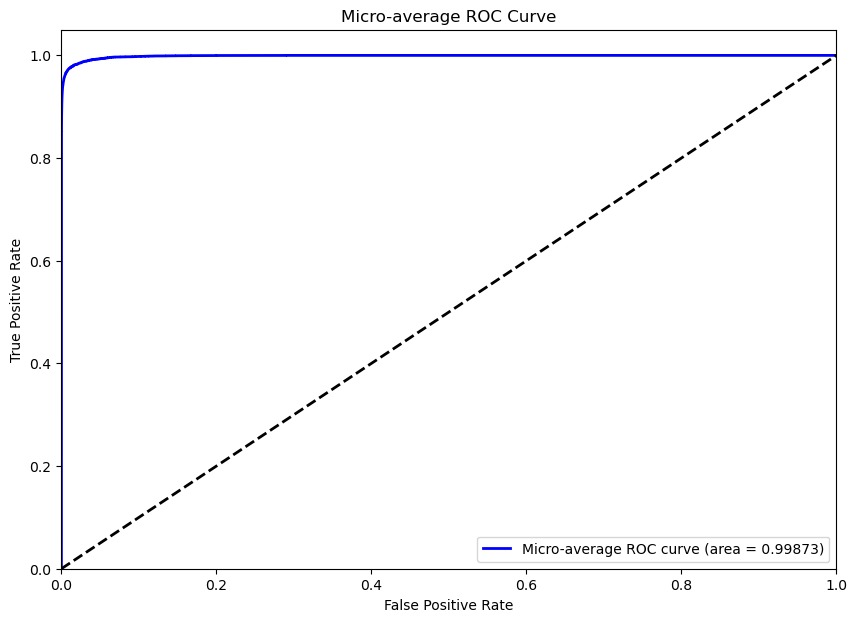

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Binarize the output
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr["micro"], tpr["micro"], color='blue', lw=2, label='Micro-average ROC curve (area = {0:0.5f})'
             ''.format(roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [7]:
y_test = to_categorical(y_test, 43)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


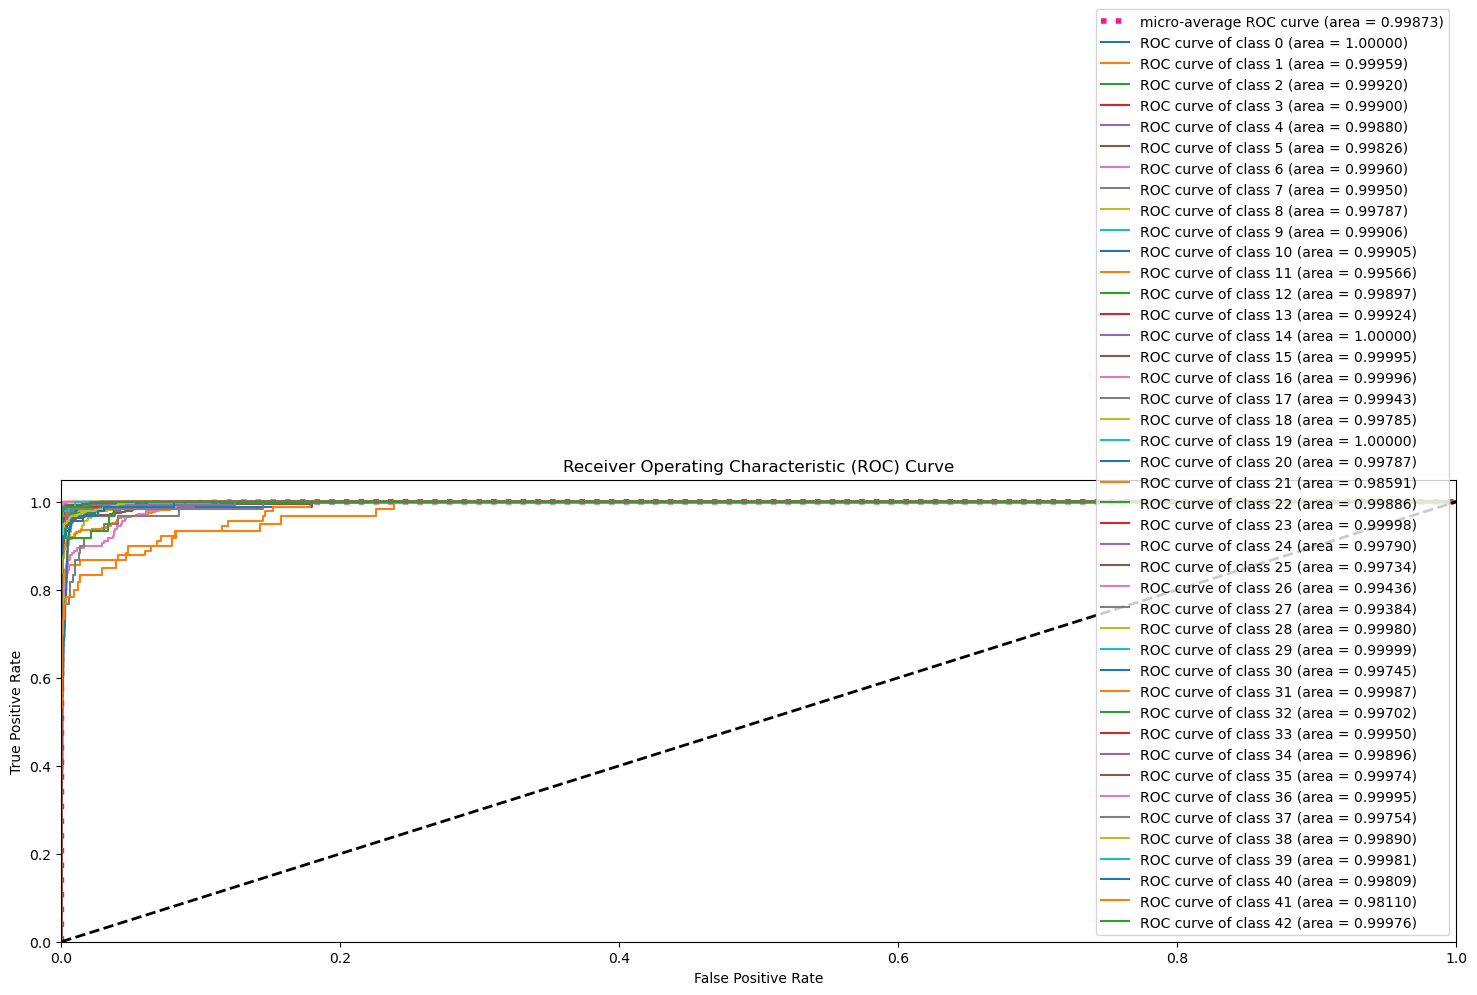

In [10]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test):
    # Predict probabilities for test set
    y_prob = model.predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test[0])):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure(figsize=(18, 6))
    plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.5f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

    for i in range(len(y_test[0])):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.5f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Sử dụng hàm để vẽ biểu đồ ROC cho mô hình của bạn
plot_roc_curve(model, X_test, y_test)
